<a href="https://colab.research.google.com/github/Geek-a-Byte/Robi-assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an
individual athlete competing in an individual Olympic event (athlete-events). The columns are:
1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA


The file regions.csv contains 230 rows and 3 columns.
1. NOC (National Olympic Committee 3 letter code)
2. Country name (matches with regions in map_data("world"))
3. Notes

# Tasks:

- [x] Import the datasets and join the data based on appropriate column.
- [x] Check for columns that have nan values.
- [x] For numeric columns, replace nan values with the column’s mean.
- [x] Which are the top 10 countries with most gold, silver, bronze medal?
- [x] Find the distribution of gold medalists according to their age.
- [x] Which is the highest playing sport that men play who are above 55 years?
- [x] Which is the highest playing sport that women play who are above 36 years?
- [x] Show a scatter plot for gold winners according to their age and weight.What do you see?
- [x] What sports are played by men and women who weighs over 120? Is less sports event played by
woman over 120kg?

# Task 1 : Import the datasets and join the data based on appropriate column.

In [283]:
import pandas as pd
  
# reading csv files
data1 = pd.read_csv('athlete_events.csv')
data2 = pd.read_csv('regions.csv')
  
# using merge function by setting how='outer'
output = pd.merge(data1, data2, on='NOC', how='outer')
# output.to_csv(r'./out1.csv', index = False, header=True)
output

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602.0,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463.0,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464.0,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271112,120575.0,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012.0,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
271113,122166.0,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,1996 Summer,1996.0,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
271114,122215.0,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984.0,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN
271115,122299.0,Mosolesa Tsie,M,20.0,175.0,75.0,Lesotho,LES,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


# Task 2 : Check for columns that have nan values.

In [284]:
import pandas as pd
  
# reading csv files
data1 = pd.read_csv('athlete_events.csv')
data2 = pd.read_csv('regions.csv')
  
# using merge function by setting how='outer'
df = pd.merge(data1, data2, on='NOC', how='outer')

# Select dataframe columns with any NaN value
subset_df = df.loc[:, df.isnull().any()]
# subset_df.to_csv(r'./out2.csv', index = False, header=True)
subset_df

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602.0,Abudoureheman,M,22.0,182.0,75.0,China,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463.0,Ai Linuer,M,25.0,160.0,62.0,China,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464.0,Ai Yanhan,F,14.0,168.0,54.0,China,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271112,120575.0,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,2012 Summer,2012.0,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
271113,122166.0,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,1996 Summer,1996.0,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
271114,122215.0,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,1984 Summer,1984.0,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN
271115,122299.0,Mosolesa Tsie,M,20.0,175.0,75.0,Lesotho,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


# Task 3 : For numeric columns, replace nan values with the column’s mean.

In [286]:
# numeric columns - ID, Age, Height, Weight, Year
import pandas as pd
  
# reading csv files
data1 = pd.read_csv('athlete_events.csv')
data2 = pd.read_csv('regions.csv')
  
# using merge function by setting how='outer'
df = pd.merge(data1, data2, on='NOC', how='outer')

# printing the total nan values of each column in merged dataframe
# print(df.isnull().sum())

df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df['ID'].fillna(value=df['ID'].mean(), inplace=True)
df['Height'].fillna(value=df['Height'].mean(), inplace=True)
df['Weight'].fillna(value=df['Weight'].mean(), inplace=True)
df['Year'].fillna(value=df['Year'].mean(), inplace=True)

df
# printing the total nan values of each column in merged dataframe to check if the nan values are replaced or not in those columns
# print(df.isnull().sum())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1.000000,A Dijiang,M,24.000000,180.00000,80.000000,China,CHN,1992 Summer,1992.00000,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2.000000,A Lamusi,M,23.000000,170.00000,60.000000,China,CHN,2012 Summer,2012.00000,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602.000000,Abudoureheman,M,22.000000,182.00000,75.000000,China,CHN,2000 Summer,2000.00000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463.000000,Ai Linuer,M,25.000000,160.00000,62.000000,China,CHN,2004 Summer,2004.00000,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464.000000,Ai Yanhan,F,14.000000,168.00000,54.000000,China,CHN,2016 Summer,2016.00000,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271112,120575.000000,Mamorallo Tjoka,F,27.000000,150.00000,56.000000,Lesotho,LES,2012 Summer,2012.00000,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
271113,122166.000000,M'apotlaki Ts'elho,F,15.000000,175.33897,70.702393,Lesotho,LES,1996 Summer,1996.00000,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
271114,122215.000000,Lefa Tsapi,M,23.000000,170.00000,63.000000,Lesotho,LES,1984 Summer,1984.00000,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN
271115,122299.000000,Mosolesa Tsie,M,20.000000,175.00000,75.000000,Lesotho,LES,2000 Summer,2000.00000,Summer,Sydney,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


# Task 4 : Which are the top 10 countries with most gold, silver, bronze medal?

In [225]:
import pandas as pd
  
# reading csv files
data1 = pd.read_csv('athlete_events.csv')
data2 = pd.read_csv('regions.csv')
  
# using merge function by setting how='outer'
df = pd.merge(data1, data2, on='NOC', how='outer')

df=df.groupby(["region", "Medal"])["region"].count().sort_values(ascending=False).reset_index(name="count")

print("Top 10 countries with most Gold:")
df_filtered = df[df['Medal']=="Gold"].reset_index(drop=True)
print(df_filtered[['region','count']].head(10))

print("Top 10 countries with most Silver:")
df_filtered = df[df['Medal']=="Silver"].reset_index(drop=True)
print(df_filtered[['region','count']].head(10))

print("Top 10 countries with most Bronze:")
df_filtered = df[df['Medal']=="Bronze"].reset_index(drop=True)
print(df_filtered[['region','count']].head(10))



Top 10 countries with most Gold:
    region  count
0      USA   2638
1   Russia   1599
2  Germany   1301
3       UK    678
4    Italy    575
5   France    501
6   Sweden    479
7   Canada    463
8  Hungary    432
9   Norway    378
Top 10 countries with most Silver:
      region  count
0        USA   1641
1    Germany   1195
2     Russia   1170
3         UK    739
4     France    610
5      Italy    531
6     Sweden    522
7  Australia    459
8     Canada    438
9     Norway    361
Top 10 countries with most Bronze:
      region  count
0        USA   1358
1    Germany   1260
2     Russia   1178
3     France    666
4         UK    651
5     Sweden    535
6      Italy    531
7  Australia    522
8     Canada    451
9    Finland    432


# Task 5 : Find the distribution of gold medalists according to their age.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


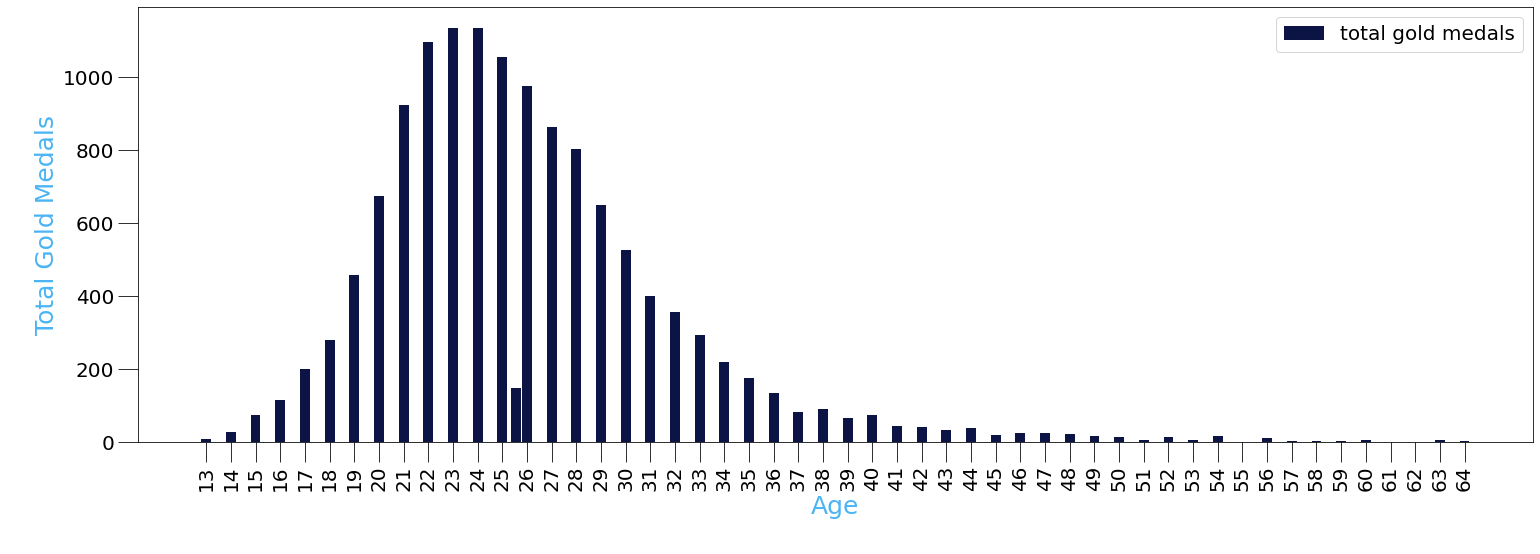

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# reading csv files
df = pd.read_csv('athlete_events.csv')

df['Age'].fillna(value=df['Age'].mean(), inplace=True)

df=df.groupby(["Age", "Medal"])["Age"].count().reset_index(name="count")
df_filtered = df[df['Medal']=="Gold"].reset_index(drop=True)

plt.figure(figsize=(25,8))

plt.xticks(np.arange(min(df_filtered.Age), max(df_filtered.Age)+1, 1))
plt.xticks(rotation='vertical',size='20',color='black')

plt.yticks(size='20',color='black')

plt.bar(df_filtered['Age'],df_filtered['count'],color='#0C1446',width=.4)

ax=plt.axes()
ax.set_ylabel('\nTotal Gold Medals',size=25,color='#4bb4f2')
ax.set_xlabel('Age\n',size=25,color='#4bb4f2')

plt.tick_params(size=20,color='black')
plt.legend(['total gold medals'],fontsize=20)


# Task 6 : Which is the highest playing sport that men play who are above 55 years? 

In [197]:
import pandas as pd
# reading csv files
df = pd.read_csv('athlete_events.csv')
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df_filtered = df[df['Age'] > 55]
df=df_filtered.groupby(["Sex", "Sport"])["Age"].count().sort_values(ascending=False).reset_index(name="count")
df[df.Sex=='M'].head(1)


,Sex,Sport,count
0,M,Art Competitions,619


# Task 7 : Which is the highest playing sport that women play who are above 36 years?

In [198]:
import pandas as pd
# reading csv files
df = pd.read_csv('athlete_events.csv')
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df_filtered = df[df['Age'] > 36]
df=df_filtered.groupby(["Sex", "Sport"])["Age"].count().sort_values(ascending=False).reset_index(name="count")
df[df.Sex=='F'].head(1)


,Sex,Sport,count
5,F,Equestrianism,448


# Task 8 : Show a scatter plot for gold winners according to their age and weight.What do you see?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Scatter plot between two variables Age and Weight')

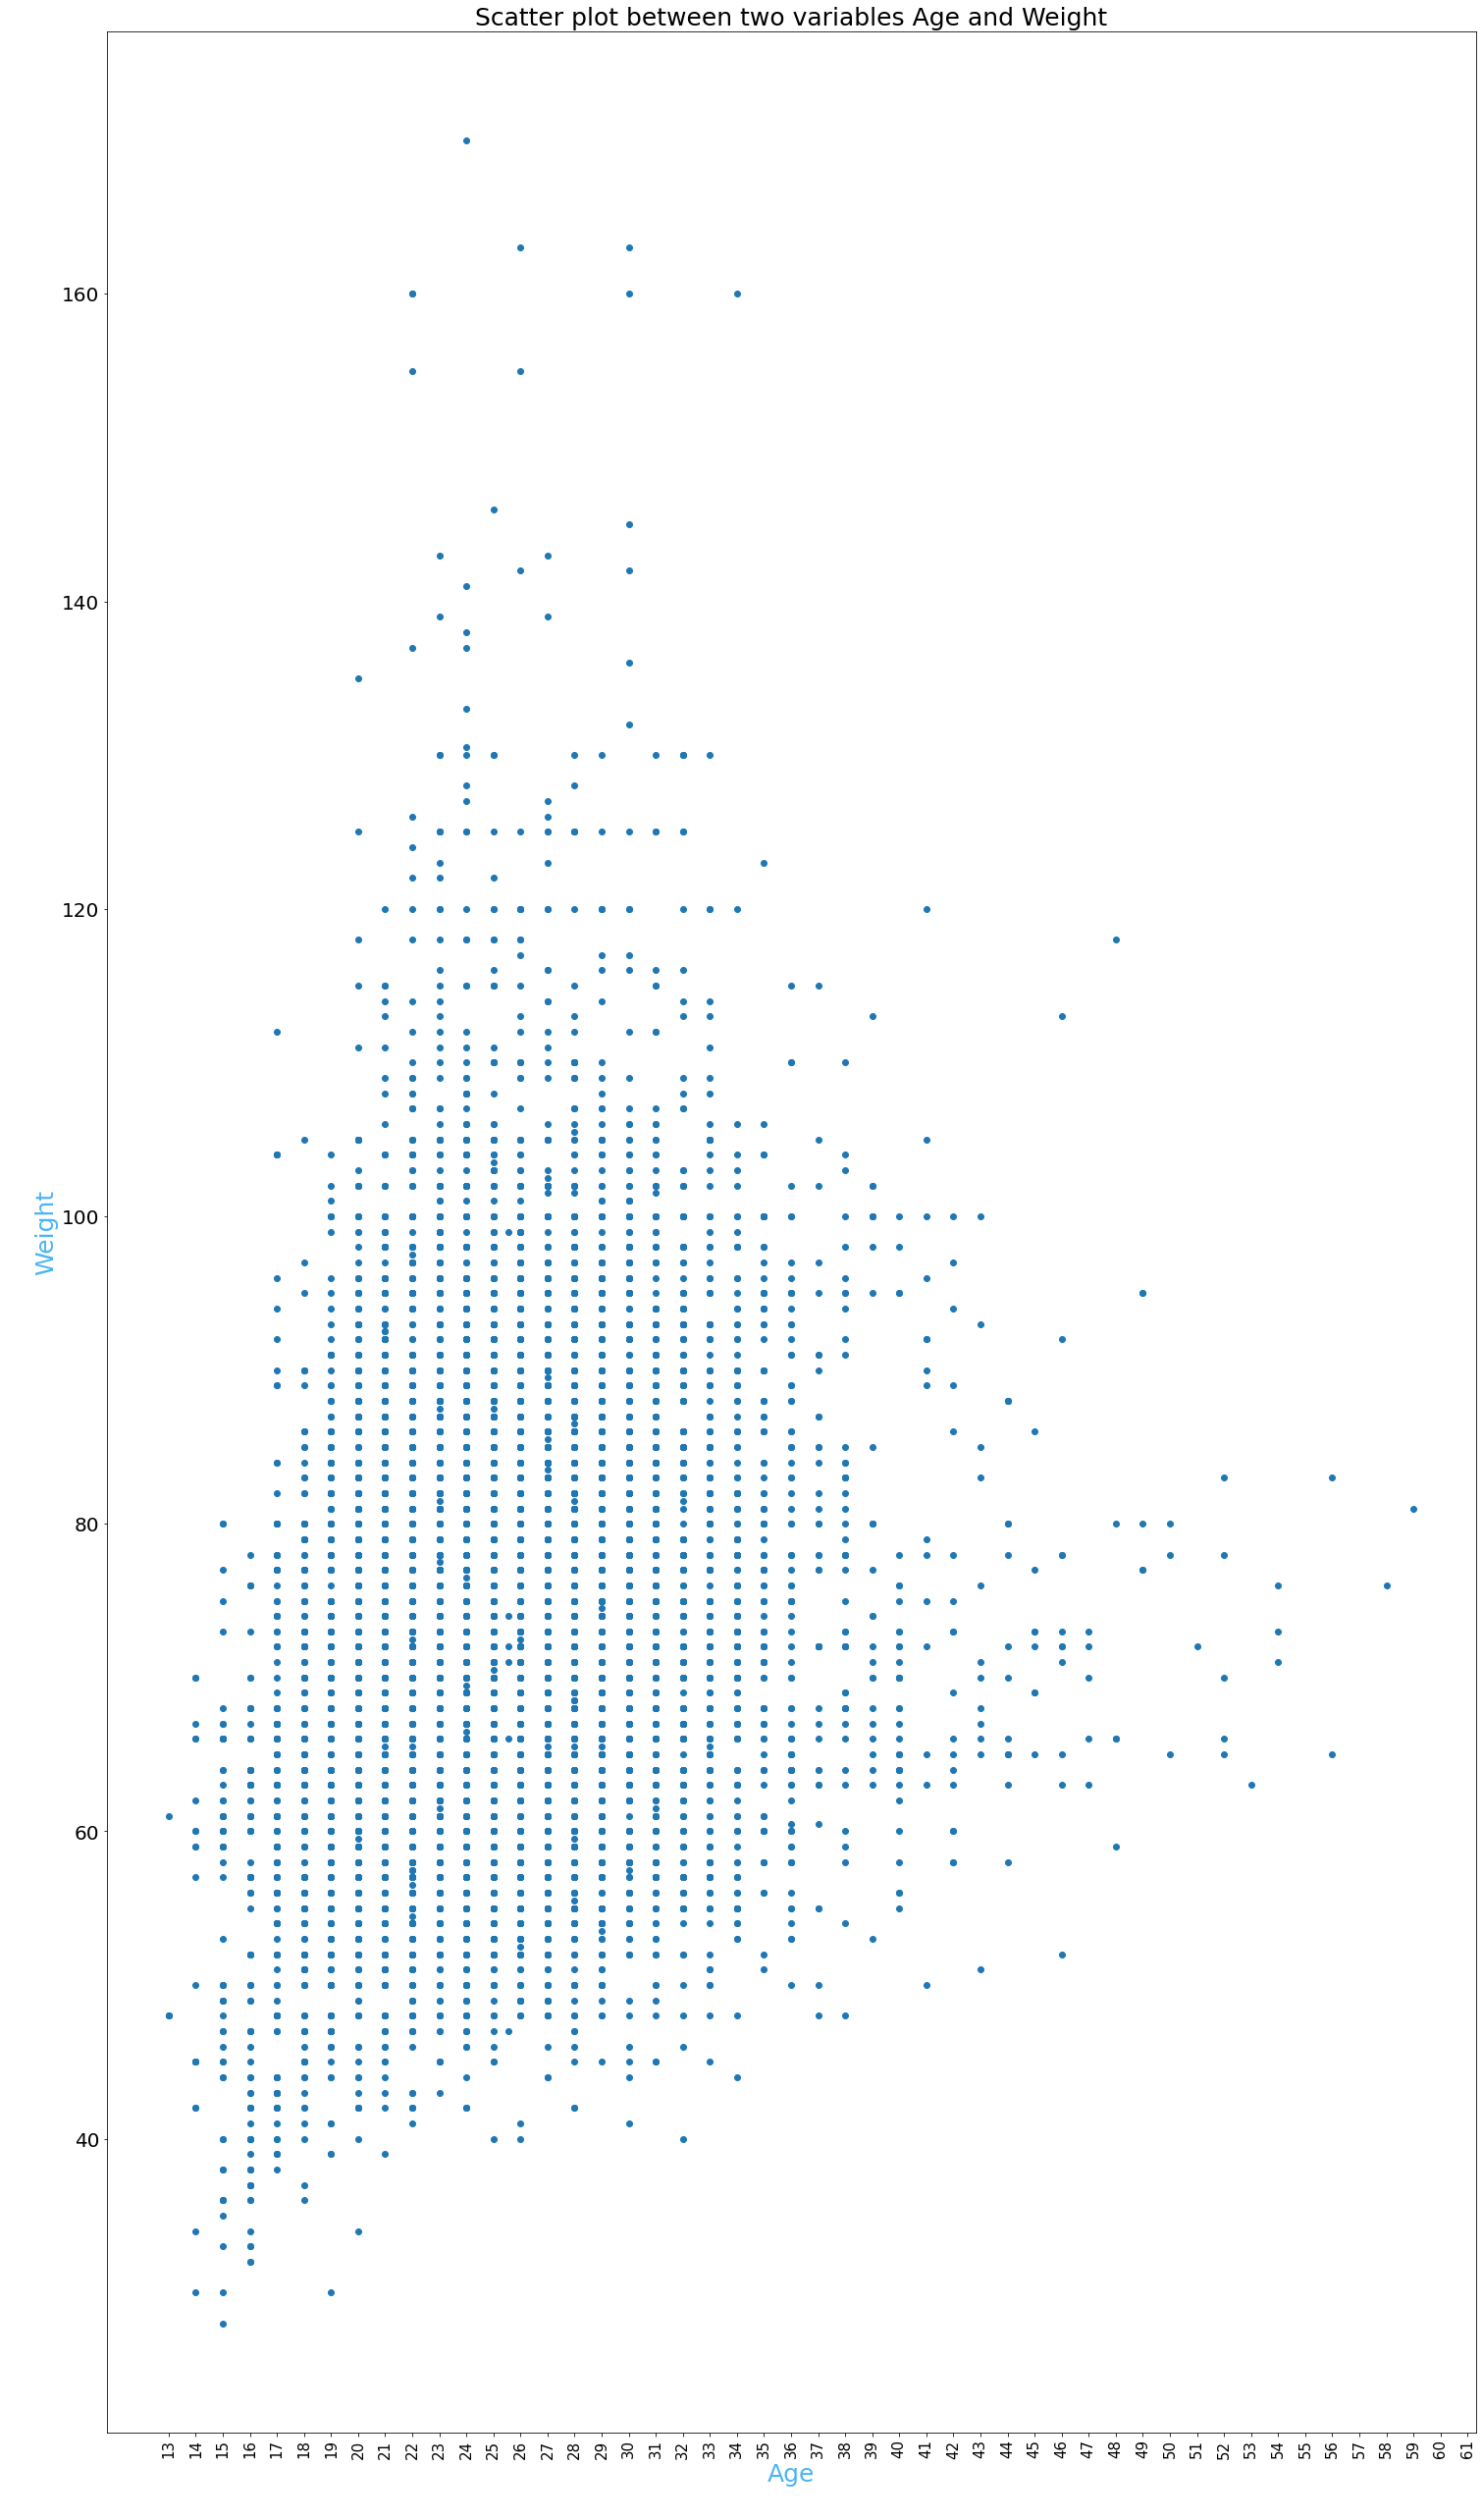

In [297]:
import pandas as pd
import matplotlib.pyplot as plot
# Load data into pandas DataFrame       

df = pd.read_csv('athlete_events.csv')

df['Age'].fillna(value=df['Age'].mean(), inplace=True)

df_filtered = df[df['Medal']=="Gold"]
x=df_filtered['Age']
y=df_filtered['Weight']

# Draw a scatter plot
plot.figure(figsize=(25,45))

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plot.xticks(rotation='vertical',size='15',color='black')

plt.yticks(size='20',color='black')

ax=plt.axes()
ax.set_ylabel('\nWeight',size=25,color='#4bb4f2')
ax.set_xlabel('Age\n',size=25,color='#4bb4f2')

plot.scatter(x, y);
plot.title("Scatter plot between two variables Age and Weight",size=25)

### the scatter plot shows that most of the gold winners weigh from 40 to 110 kgs, and their age lies between 15 to 36 yrs.

# Task 9 : What sports are played by men and women who weighs over 120? Is less sports event played by woman over 120kg?

Text(0.5, 1.0, 'Male-Female Ratio over 120 kg\n\n')

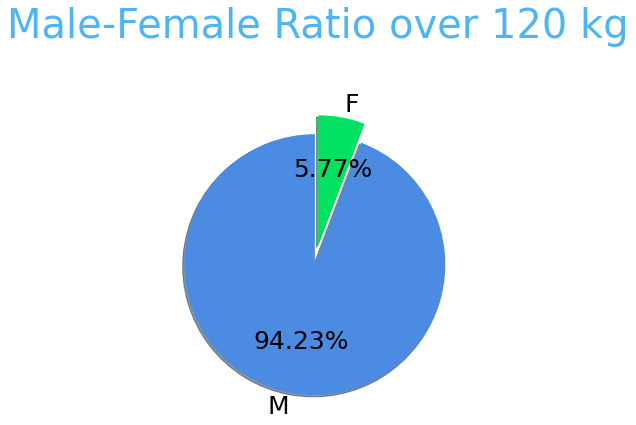

In [298]:
import pandas as pd
import matplotlib.pyplot as plt

# reading csv files
df = pd.read_csv('athlete_events.csv')
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df_filtered = df[df['Weight'] > 120]
df=df_filtered.groupby(["Sex"])["Sex"].count().sort_values(ascending=False).reset_index(name="Total Sports Played by person>120 kg")

slices = df['Total Sports Played by person>120 kg']
genders = df['Sex']

# cols is for coloring each slices
# We can define colors to assign by passing a list of corresponding colors. 
cols=['#4C8BE2','#00e061']

# To space out each piece of Pie we can pass on the list of corresponding values to ‘explode’.
exp = [0.2,0.02]

# To plot a Pie Chart we call ‘.pie’ function which takes x values which is ‘slices’ over here 
# based on it the pie is divided followed by labels which have the corresponding string the values it represents. 
# These string values can be altered by ‘textprops’.
# To change the radius or size of Pie we call ‘radius’. 
# For the aesthetics we call ‘shadow’ as True and ‘startangle ’= 90. 

# The ‘autopct’ defines the number of positions that are allowed to be shown. 
# In this case, autopct allows 2 positions before and after the decimal place.

    
plt.pie(slices,labels=genders,
        textprops=dict(size=25,color='black'),
        radius=1.5,
        colors=cols,
        autopct='%2.2f%%',
        explode=exp,
        shadow=True,
        startangle=90)
 
plt.title('Male-Female Ratio over 120 kg\n\n',color='#4fb4f2',size=40)

### less sports event played by woman over 120kg.